In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# Imports
import sys
project_path = '../'
sys.path.append(project_path)
from backtest_utils import TradingSimulator
import pickle, os
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import figure
from pprint import pprint

# Run a Backtest

In [4]:
strategy_name = 'smooth_operator'

TS = TradingSimulator(strategy_name)

# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = project_path + 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [5]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

In [6]:
stock_symbols_pickle = project_path + 'stock_symbols.pkl'  # Name of the pickle file
# TS.SAU.update_stock_data(pickle_file=stock_symbols_pickle)

In [12]:
from backtest_utils import TradingSimulator
start_date = '2023-02-28'
end_date = '2024-06-28'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 0
portfolio_starting_value = 100000
risk_pct = 0.1
reinvest_profits_bool = True
leverage_multiplier = 1.0
strategy_name = 'smooth_operator'
save_test = True

# Run the backtest
''' 
BEST TEST RESULTS
TS_leverage = TradingSimulator(strategy_name)
risk_pct = 0.05
leverage_multiplier = 3.0
long_count = 10
short_count = 0
reinvest_profits_bool = False
test_2 = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=leverage_multiplier, save_test=save_test)

'''
TS_leverage = TradingSimulator(strategy_name)
# symbols = symbols[:100]
risk_pct = 0.10
leverage_multiplier = 1.0
long_count = 10
short_count = 0
reinvest_profits_bool = False
rebalance_frequency = 15  # In days
# test_1 = TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=leverage_multiplier, save_test=save_test)
import cProfile
cProfile.run('TS_leverage.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier=leverage_multiplier, save_test=save_test)', 'restats')



Running backtest: 2024-02-23 - 2024-03-08:  79%|███████▉  | 26/33 [10:44<02:55, 25.10s/it, Profit=4.06e+4] /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/dev/../vault/smooth_operator.py:150: RuntimeWarning: invalid value encountered in divide
  normalized_columns = (columns_to_normalize - columns_to_normalize.min(axis=0)) / (columns_to_normalize.max(axis=0) - columns_to_normalize.min(axis=0))
Running backtest: 2024-02-23 - 2024-03-08:  82%|████████▏ | 27/33 [11:10<02:31, 25.30s/it, Profit=4.06e+4]/Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/dev/../vault/smooth_operator.py:150: RuntimeWarning: invalid value encountered in divide
  normalized_columns = (columns_to_normalize - columns_to_normalize.min(axis=0)) / (columns_to_normalize.max(axis=0) - columns_to_normalize.min(axis=0))
Running backtest: 2024-02-23 - 2024-03-08:  85%|████████▍ | 28/33 [11:36<02:07, 25.46s/it, Profit=4.06e+4]/Users/vandanchopra/Vandan_Personal_Folder/

Backtest results saved to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_1.pkl


In [14]:
# run cProfile on the code
import pstats
p = pstats.Stats('restats')
p.sort_stats('cumulative').print_stats(30)


Tue Mar 19 05:18:42 2024    restats

         2663727216 function calls (2613819663 primitive calls) in 856.729 seconds

   Ordered by: cumulative time
   List reduced from 1065 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  856.734  856.734 {built-in method builtins.exec}
        1    0.191    0.191  856.734  856.734 <string>:1(<module>)
        1    1.447    1.447  856.543  856.543 /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/dev/../backtest_utils.py:105(run_backtest)
       33    2.218    0.067  746.112   22.609 /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/dev/../vault/smooth_operator.py:47(get_analysis_array)
   203536   20.547    0.000  743.630    0.004 /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/dev/../vault/smooth_operator.py:16(create_analysis_array_symbol)
11279030/5749738    5.278    0.000  381.10

# BACKTEST ANALYSIS

In [52]:
from analysis_utils import BacktestAnalyzer, compare_two_backtests, BackTestManager
import quantstats_lumi as qs
BTM = BackTestManager()

In [53]:
backtests_table = BTM.remake_backtests_table()
backtests_table = BTM.load_backtests_table()
# show me all columns except 'symbols'
backtests_table.drop(columns=['symbols'], inplace=True)
# backtests_table[backtests_table['reinvest_profits_bool'] == False][backtests_table['strategy_name'] == 'smooth_operator']
backtests_table['test_filename'] = backtests_table['test_filename'].apply(lambda x: x.split('/')[-1])
# Convert test_run_dt to datetime
backtests_table['test_run_dt'] = pd.to_datetime(backtests_table['test_run_dt'])
# Convert test_run_dt to string
backtests_table['test_run_dt'] = backtests_table['test_run_dt'].dt.strftime('%y-%m-%d %H:%M:%S')
backtests_table.transpose()

{'backtest_files': ['Test_8.pkl', 'Test_9.pkl', 'Test_8_analysis.html', '.DS_Store', 'Test_5_analysis.html', 'Test_1_analysis.html', 'Test_6_analysis.html', 'Test_2_analysis.html', 'Test_3_analysis.html', 'Test_7_analysis.html', 'backtests_table.csv', 'Test_0_analysis.html', 'Test_4_analysis.html', 'Test_1.pkl', 'Test_0.pkl', 'Test_2.pkl', 'Test_3.pkl', 'Test_7.pkl', 'Test_6.pkl', 'Test_4.pkl', 'Test_5.pkl']}
Remade backtests table


,1,0,6,7,9,8,5,4,2,3
test_run_dt,24-03-19 00:32:38,24-03-19 00:28:14,24-03-19 00:25:44,24-03-19 00:25:05,24-03-19 00:23:55,24-03-18 14:49:20,24-03-15 07:20:46,24-03-15 06:33:53,24-03-15 05:46:48,24-03-15 05:30:28
strategy_name,smooth_operator,smooth_operator,smooth_operator,smooth_operator,smooth_operator,smooth_operator,smooth_operator,smooth_operator,smooth_operator,smooth_operator
start_date_dt,2000-02-28,2023-02-28,2023-02-28,2023-02-28,2023-02-28,2023-01-01,1980-01-01,1980-01-01,1980-01-01,1980-01-01
end_date_dt,2005-02-28,2024-02-28,2024-02-28,2024-02-28,2024-02-28,2024-02-28,2010-12-31,2010-12-31,2010-12-31,2010-12-31
rebalance_frequency,7,7,7,30,30,30,15,15,30,30
long_count,10,10,10,10,10,10,10,10,10,10
short_count,0,0,0,0,0,0,10,0,0,0
portfolio_starting_value,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
risk_pct,0.1,0.1,0.1,0.1,0.05,0.05,0.05,0.05,0.1,0.05
reinvest_profits_bool,False,False,False,False,False,False,False,False,False,False


In [54]:
# Create reports for all tests that don't have reports
for test_num in range(len(backtests_table)):
    test = BTM.load_test(test_num)
    backtests_table.iloc[test_num]['test_filename']
    test_file_path = BTM.get_test_filepath_from_backtests_table(test_num)
    report_filepath = test_file_path.replace('.pkl', '_analysis.html')
    if not os.path.exists(report_filepath):
        BacktestAnalyzer(test).create_test_full_tearsheet(test_num)
        print(f"Saved report to {report_filepath}")

/Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Profit in Mn: 0.10349351472042799
Saved report to /Users/vandanchopra/Vandan_Personal_Folder/CODE_STUFF/Projects/mathematricks/backtests/Test_9_analysis.html


In [55]:
# Choose Test
# test_num = 2
# test = BTM.load_test(test_num)
test = test_1

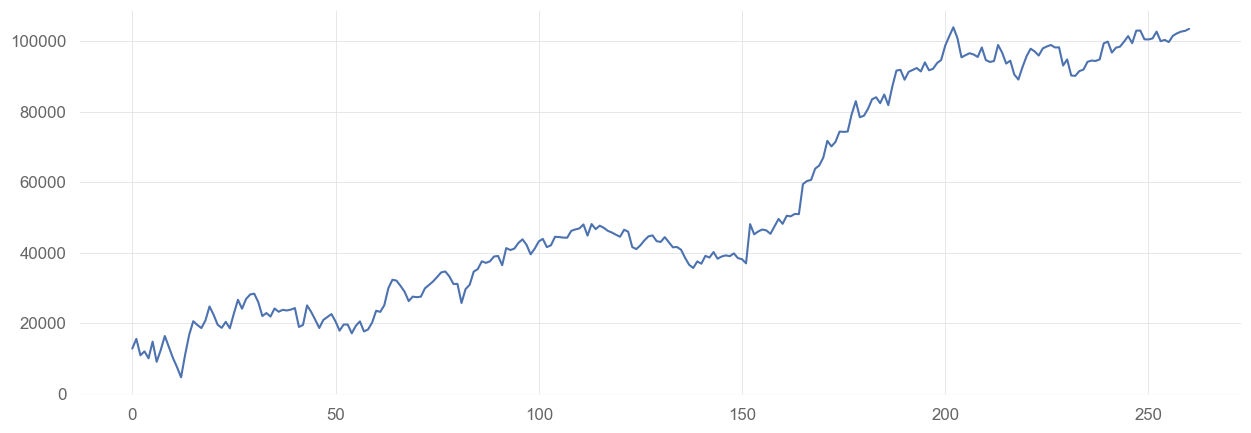

In [56]:
plt.figure(figsize=(15, 5))
plt.plot(np.cumsum(test['backtest_profits']))

In [57]:
BA = BacktestAnalyzer(test)
# Create orders df
orders_df = BA.create_orders_df()

final_dict = BA.test_metrics_orders(orders_df)
pprint(final_dict, sort_dicts=False)

{'total': {'win_ratio': 0.48812260536398466,
           'average_win': 390.4995705988287,
           'average_loss': -319.8075797260388,
           'risk_reward_ratio': 1.2210453890221982,
           'pct_of_stoploss_hit': 0.9494252873563218,
           'probability_of_profit': 0.5960198565571956}}


In [50]:
# Give me the top 10 shorted assets
orders_df = orders_df[orders_df['direction'] == 1.0]
top_10_assets =  orders_df['symbol'].value_counts().head(10).index
top_10_assets

Index(['RMBS', 'RIOT', 'GFF', 'MELI', 'PARR', 'STN', 'IREN', 'PAA', 'KINS',
       'HCM'],
      dtype='object', name='symbol')

In [33]:
# Give me the top 10 shorted assets
orders_df = orders_df[orders_df['direction'] == 1.0]
top_10_assets =  orders_df['symbol'].value_counts().head(10).index

# use the eye ball function to see the trades for the top 10 traded assets on one big graph with subplots

pruned_orders_df = short_orders_df
for i, symbol in enumerate(top_10_shorted_assets):
    asset_data, min_date, max_date, ax = BA.eyeball_symbol(symbol, test, pruned_orders_df, figsize=(15, 6), orders_to_show=1)
    ax.set_title(symbol)
    ax.set_ylabel('Price')
    ax.set_xlabel('Date')
    ax.legend()
    
# # Give me the top 10 traded assets
# top_10_traded_assets =  orders_df['symbol'].value_counts().head(10).index

# pruned_orders_df = orders_df
# for i, symbol in enumerate(top_10_shorted_assets):
#     asset_data, ax = BA.eyeball_symbol(symbol, test, pruned_orders_df)
#     ax.set_title(symbol)
#     ax.set_ylabel('Price')
#     ax.set_xlabel('Date')
#     ax.legend()


ValueError: a must be greater than 0 unless no samples are taken